In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgscen.iso.ercot import create_day_ahead_load_solar_joint_scenario

In [2]:
load_zone_actual_df = pd.read_csv('../data/Load/ERCOT/Actual/load_actual_1h_zone_2017_2018_utc.csv',
                                 parse_dates=['Time'],index_col='Time')
load_zone_forecast_df = pd.read_csv('../data/Load/ERCOT/Day-ahead/load_day_ahead_forecast_zone_2017_2018_utc.csv',
                                   parse_dates=['Issue_time','Forecast_time'])
load_zone_list = load_zone_actual_df.columns.tolist()

In [3]:
solar_meta_df = pd.read_excel('../data/MetaData/solar_meta.xlsx')

In [4]:
solar_site_actual_df = pd.read_csv('../data/Solar/NREL/Actual/solar_actual_1h_site_2017_2018_utc.csv',
                                  parse_dates=['Time'],index_col='Time')

solar_site_forecast_df = pd.read_csv('../data/Solar/NREL/Day-ahead/solar_day_ahead_forecast_site_2017_2018_utc.csv',
                                  parse_dates=['Issue_time','Forecast_time'])

solar_site_list = solar_site_actual_df.columns.tolist()

In [5]:
nscen = 1000
scenario_start_time = pd.to_datetime('2018-10-01 06:00:00',utc=True)
output_dir = '/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/'

In [6]:
load_zone_hist_actual_df = load_zone_actual_df[load_zone_actual_df.index<scenario_start_time]
load_zone_hist_forecast_df = load_zone_forecast_df[load_zone_forecast_df['Forecast_time']<scenario_start_time]

load_zone_future_actual_df = load_zone_actual_df[load_zone_actual_df.index>=scenario_start_time]
load_zone_future_forecast_df = load_zone_forecast_df[load_zone_forecast_df['Forecast_time']>=scenario_start_time]

In [7]:
solar_site_hist_actual_df = solar_site_actual_df[solar_site_actual_df.index<scenario_start_time]
solar_site_hist_forecast_df = solar_site_forecast_df[solar_site_forecast_df['Forecast_time']<scenario_start_time]

solar_site_future_actual_df = solar_site_actual_df[solar_site_actual_df.index>=scenario_start_time]
solar_site_future_forecast_df = solar_site_forecast_df[solar_site_forecast_df['Forecast_time']>=scenario_start_time]

In [8]:
se = create_day_ahead_load_solar_joint_scenario(nscen,scenario_start_time,load_zone_list,
        load_zone_hist_forecast_df,load_zone_hist_actual_df,solar_meta_df,solar_site_list,
        solar_site_hist_forecast_df,solar_site_hist_actual_df,load_zone_future_forecast_df,
        solar_site_future_forecast_df,load_future_actual_df=load_zone_future_actual_df,
        solar_future_actual_df=solar_site_future_actual_df,output_dir=output_dir,return_engine=True)

(1000, 88)
7 17


In [11]:
!ls /Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/20181001/solar/

Adamstown_Solar.csv               Mustang_Creek_Solar.csv
Agate_Solar.csv                   Myrtle_Solar.csv
Angelina_Solar.csv                Nazareth_Solar.csv
Angelo_Solar.csv                  Neeley_Solar.csv
Angus_Solar.csv                   Noble_Solar.csv
Anson_Solar.csv                   Normande_Solar_Farm.csv
Anson_Solar_Center,_Phase_II.csv  Norton_Solar.csv
Anson_Solar_Center,_Phase_III.csv Oberon_Solar.csv
Aragorn_Solar.csv                 Obsidian_Solar.csv
Arroyo_Del_Bisonte_Solar.csv      Opal_Solar.csv
Arroyo_Solar.csv                  Owego_Solar.csv
Atascosa_I_Solar.csv              Owens_Solar.csv
Bacon_Switch_Solar.csv            Oxbow_Solar.csv
Basalt_Solar.csv                  Oxy_Solar.csv
Bestla_Solar.csv                  Pflugerville_2_Solar.csv
Blackwater_Draw_Solar.csv         Pflugerville_Solar.csv
BlueBell_Solar.csv                Phoebe_Solar.csv
Blue_Bell_Solar_II.csv            Phoenix_Solar.csv
Blue_Jay_Solar.csv                Pine_Forest_Solar.csv
Bl

In [23]:
df = pd.read_csv('/Users/xy3134/Research/PERFORM/Data/GEMINI_scenario/test/20181001/solar/Adamstown_Solar.csv')

(array([ 13.,  19.,   8.,  19.,  18.,  28.,  19.,  22.,  28.,  19.,  31.,
         31.,  20.,  30.,  59.,  53.,  74., 123.,  92.,  48.,  68.,  46.,
         37.,  27.,  35.,  16.,   8.,   7.,   0.,   4.]),
 array([  0.        ,   8.33333333,  16.66666667,  25.        ,
         33.33333333,  41.66666667,  50.        ,  58.33333333,
         66.66666667,  75.        ,  83.33333333,  91.66666667,
        100.        , 108.33333333, 116.66666667, 125.        ,
        133.33333333, 141.66666667, 150.        , 158.33333333,
        166.66666667, 175.        , 183.33333333, 191.66666667,
        200.        , 208.33333333, 216.66666667, 225.        ,
        233.33333333, 241.66666667, 250.        ]),
 <BarContainer object of 30 artists>)

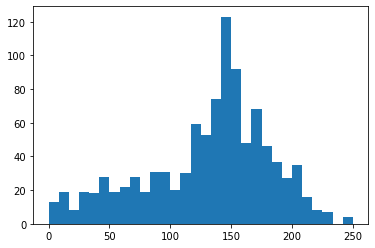

In [26]:
plt.hist(df['1700'],bins=30)

(array([ 9.,  3.,  6., 14., 12., 13., 10., 11., 18., 14., 16., 15., 15.,
        17., 30., 33., 46., 72., 45., 40., 28., 23., 21., 17.,  8., 10.,
         4.,  5.,  1.,  2.]),
 array([-140.67248775, -132.1551777 , -123.63786765, -115.1205576 ,
        -106.60324755,  -98.0859375 ,  -89.56862745,  -81.0513174 ,
         -72.53400735,  -64.0166973 ,  -55.49938725,  -46.98207721,
         -38.46476716,  -29.94745711,  -21.43014706,  -12.91283701,
          -4.39552696,    4.12178309,   12.63909314,   21.15640319,
          29.67371324,   38.19102328,   46.70833333,   55.22564338,
          63.74295343,   72.26026348,   80.77757353,   89.29488358,
          97.81219363,  106.32950368,  114.84681373]),
 <BarContainer object of 30 artists>)

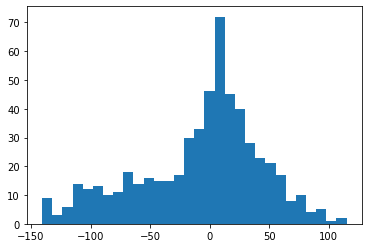

In [35]:
plt.hist(se.gemini_dict[0]['solar_generator'].conditional_gpd_dict['Adamstown Solar_4'].slots['data'],bins=30)

In [44]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

In [38]:
arr = np.random.randn(1000)

In [40]:
f = ECDF(arr)

ValueError: supplied range of [-3.090232306167813, inf] is not finite

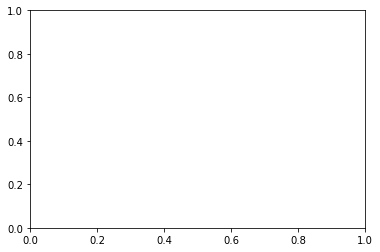

In [46]:
plt.hist(norm.ppf(f(arr)),bins=100)

In [64]:
# np.clip(f(arr),1e-4,0.9999)
u = norm.ppf(f(arr).clip(1e-4,0.9999))

In [65]:
norm.cdf(f,u)

TypeError: unsupported operand type(s) for -: 'ECDF' and 'float'

In [66]:
f